## <font color='darkblue'>Preface</font>
([article source](https://towardsdatascience.com/analyzing-data-distributions-with-seaborn-a8607961a212)) <font size='3ptx'>**A practical guide with many example plots**</font>

**Data visualizations are key players in data science.** They are powerful at exploring variables and the relations among them. Data visualizations are also much more preferred than plain numbers to deliver results and findings. **In this article, we will see how data visualizations can be used to explore the distribution of variables.** The examples will be done using a famous Python data visualization library called [**Seaborn**](https://seaborn.pydata.org/).

It is essential to interpret the distribution of variables. For instance, some machine learning models perform best when the variables have a normal distribution. Thus, **the distribution of variables directs our strategy to approach problems.**

Distributions are also integral parts of exploratory data analysis. We can detect outliers, skewness, or get an overview of the measures of central tendency (<font color='brown'>mean, median, and mode</font>).

I think we have highlighted the importance of data distributions clearly. We can now start on the examples.

## <font color='darkblue'>Loading Data</font>
We will be using an [**insurance dataset**](https://www.kaggle.com/mirichoi0218/insurance) that you can obtain from Kaggle. The first step is to import the libraries and read the dataset into a Pandas dataframe.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='darkgrid')

In [4]:
#!pip install pandas
#!pip install seaborn

In [6]:
insurance = pd.read_csv("../../datas/Medical_Cost_Personal_Datasets/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


The dataset contains some measures (<font color='brown'>i.e. features</font>) about the customers of an insurance company and the amount that is charged for the insurance.

## <font color='darkblue'>Data Visualization</font>


### <font color='darkgreen'>Histogram</font>
The first type of visualization we will see is the histogram. **It divides the value range of continuous variables into discrete bins and shows how many values exist in each bin.** The following is a basic histogram of the bmi variable.

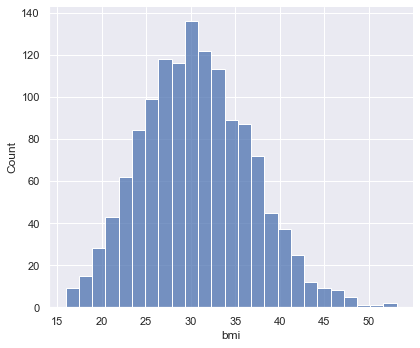

In [7]:
sns.displot(insurance, x='bmi', kind='hist', aspect=1.2)

We can use the [displot](https://seaborn.pydata.org/generated/seaborn.displot.html?highlight=displot#seaborn.displot) function of seaborn and specify the type of distribution using the kind parameter. The <font color='violet'>aspect</font> variable adjusts the height-width ratio of the figure. The `bmi` variable has a normal distribution except for a few outliers above 50.

The [displot](https://seaborn.pydata.org/generated/seaborn.displot.html?highlight=displot#seaborn.displot) function allows for adding a <font color='violet'>kde</font> plot on top of histograms. The kde (<font color='brown'>kernel density estimation</font>) plot is a non-parametric way to estimate the probability density function of a random variable.

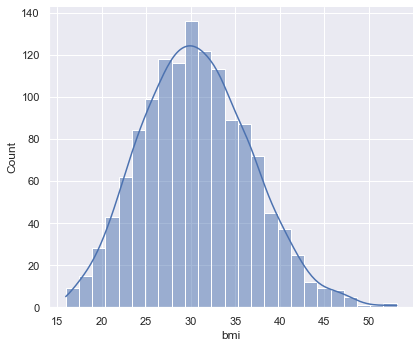

In [8]:
sns.displot(insurance, x='bmi', kind='hist', kde=True, aspect=1.2)

We have the option to create only the kde plot by setting the <font color='violet'>kind parameter</font> as of the [displot](https://seaborn.pydata.org/generated/seaborn.displot.html?highlight=displot#seaborn.displot) function as ‘kde’. In that case, we do not need to use the kde parameter.

We can plot the distribution of a variable separately based on the categories of another variable. One way is to use the <font color='violet'>hue</font> parameter. The figure below shows the histogram of `bmi` variable for **smoker** and **non-smoker** people separately.

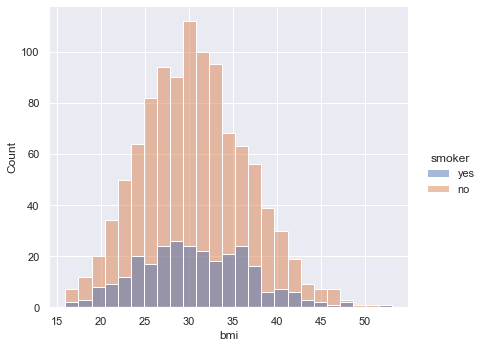

In [9]:
sns.displot(insurance, x='bmi', kind='hist', hue='smoker', aspect=1.2)

We can also show the bars side-by-side by using the <font color='violet'>multiple</font> parameter.

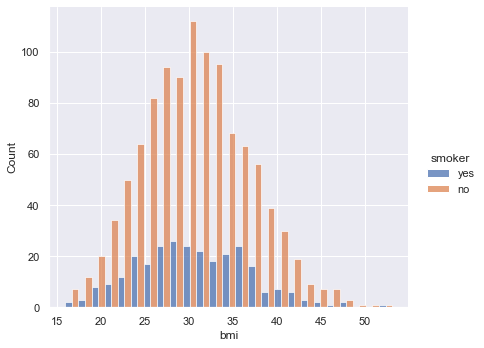

In [10]:
sns.displot(insurance, x='bmi', kind='hist', hue='smoker', multiple='dodge', aspect=1.2)

It is possible to **create a grid of plots with the [displot](https://seaborn.pydata.org/generated/seaborn.displot.html?highlight=displot#seaborn.displot) function which is a highly useful feature**. We can create more informative visualizations by using the <font color='violet'>hue</font> and <font color='violet'>col</font> parameters together.

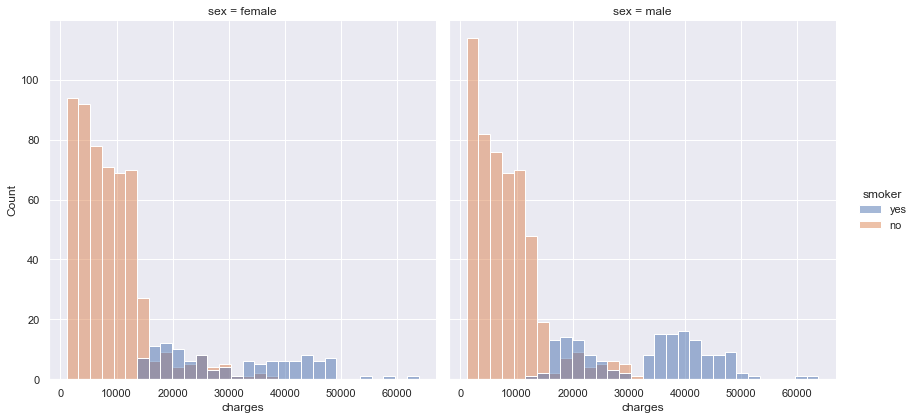

In [11]:
sns.displot(insurance, x='charges', kind='hist', hue='smoker', col='sex', height=6, aspect=1)

The figure above shows the distribution of the charges variable in different settings. We clearly see that **the charge is likely to be more for people who smoke. The ratio of smokers is more for males and it is for females.**

We can also **create two-dimensional histograms that give us an overview of the cross-distribution of two variables**. The `x` and `y` parameters of the [displot](https://seaborn.pydata.org/generated/seaborn.displot.html?highlight=displot#seaborn.displot) function are used to create a two-dimensional histogram.

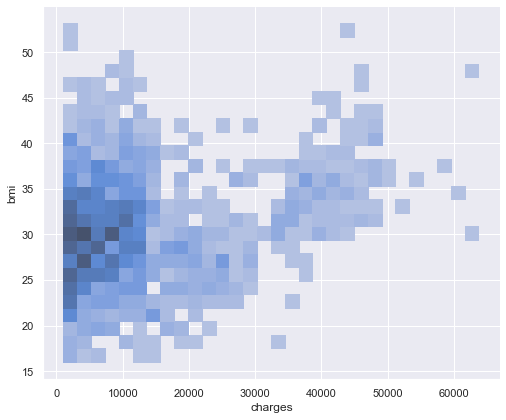

In [12]:
sns.displot(insurance, x='charges', y='bmi', kind='hist', height=6, aspect=1.2)

This figure shows the distribution of the `bmi` and `charges` variables. The darker parts of grid denser in terms of the number of data points (<font color='brown'>i.e. rows</font>) they contain.

Another feature we can use about the distributions is the <font color='darkblue'>**rug plot**</font>. It draws ticks along x and y axes to represent marginal distributions. Let’s add rug plot to the two-dimensional histogram created in the previous step.

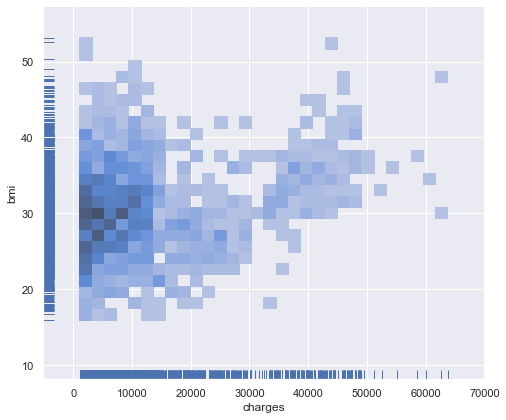

In [13]:
sns.displot(insurance, x='charges', y='bmi', kind='hist', rug=True, height=6, aspect=1.2)

The plot is more informative now. In addition to the two-dimensional histogram, the rug plot on the axes provides an overview of the distribution of the individual variables.

The <font color='violet'>hue</font> parameter can also be used with two-dimensional histograms.

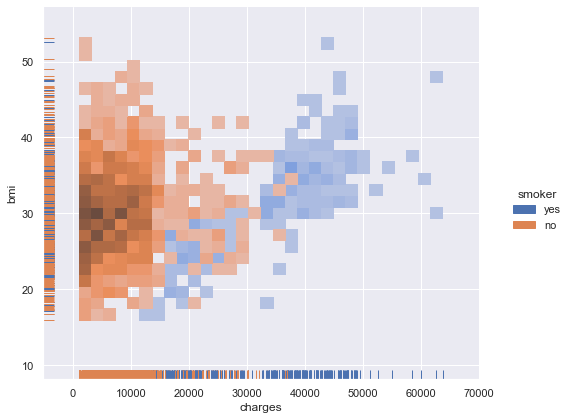

In [14]:
sns.displot(insurance, x='charges', y='bmi', kind='hist',rug=True, hue='smoker',height=6, aspect=1.2)

We can also **create bivariate kde plots**. For instance, the plot below is the kde version of the previous two-dimensional histogram.

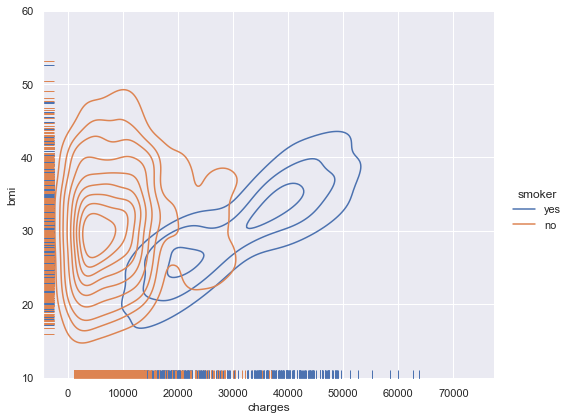

In [15]:
sns.displot(insurance, x='charges', y='bmi', kind='kde',rug=True, hue='smoker',height=6, aspect=1.2)

The density of lines gives us an idea about the distribution. We can use the <font color='violet'>fill</font> parameter to make it look more like a histogram.

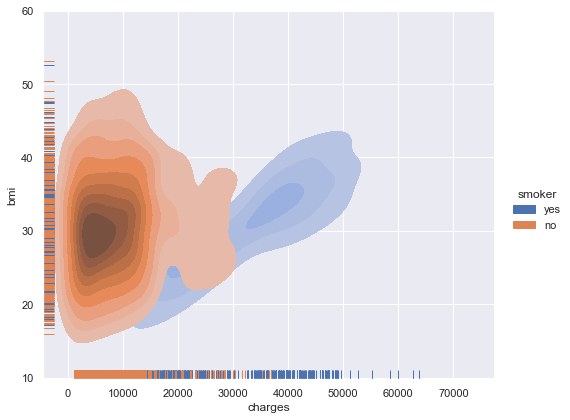

In [16]:
sns.displot(insurance, x='charges', y='bmi', kind='kde',rug=True, hue='smoker',fill=True, height=6, aspect=1.2)

### <font color='darkgreen'>Scatter Plot</font>
**Scatter plots are mainly used to check the correlations between two numerical variables**. However, they also give us an idea about the distributions.

Seaborn is quite flexible in terms of combining different kinds of plots to create a more informative visualization. For instance, the jointplot combines scatter plots and histograms.

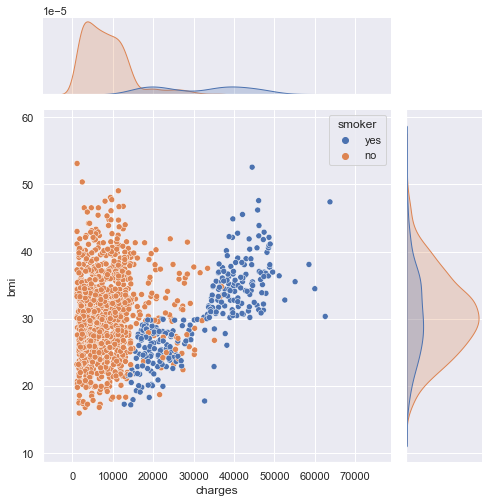

In [17]:
sns.jointplot(data=insurance, x='charges', y='bmi', hue='smoker', height=7, ratio=4)

## <font color='darkblue'>Conclusion</font>
For data analysis or machine learning tasks, it is crucial to learn about the distribution of variables (<font color='brown'>i.e. features</font>). **How we approach given tasks may depend on the distribution.**

[**Seaborn**](https://seaborn.pydata.org/index.html) offers many high-level functions to plot distributions. We can also combine different kinds of plots to create more informative visualizations. In this article, we have seen how to use the displot and jointplot functions in that sense.